In [99]:
import pandas as pd
import numpy as np
Bd=pd.read_csv('bigdata.csv')
Bd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [100]:
Bd.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [101]:
Bd.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [102]:
Bd.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [103]:
Bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


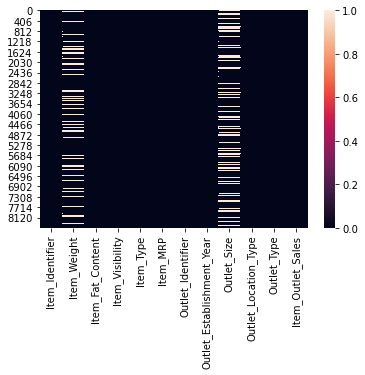

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Bd.isnull())
plt.show()

In [105]:
Bd.Item_Weight=Bd.Item_Weight.fillna(Bd.Item_Weight.mean())

In [106]:
Bd['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [107]:
Bd.Outlet_Size=Bd.Outlet_Size.fillna(Bd.Outlet_Size.fillna('Medium'))

In [108]:
Bd.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

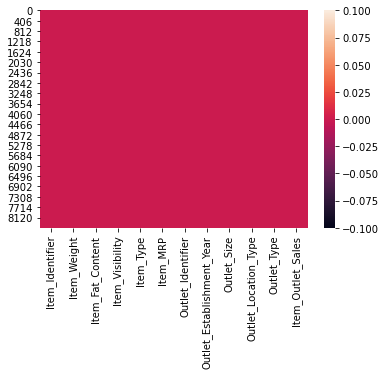

In [109]:
sns.heatmap(Bd.isnull())
plt.show()

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type']
for val in list1:
    Bd[val]=le.fit_transform(Bd[val].astype(str))

In [111]:
Bd.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [112]:
Bd1=Bd.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [113]:
Bd1.shape

(8523, 9)

In [114]:
Bd1.skew()

Item_Weight             0.090561
Item_Fat_Content        0.994824
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
dtype: float64

In [115]:
for col in Bd1.columns:
    if Bd1[col].skew()>0.55:
        Bd1[col]=np.log1p(Bd1[col])

In [116]:
Bd.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

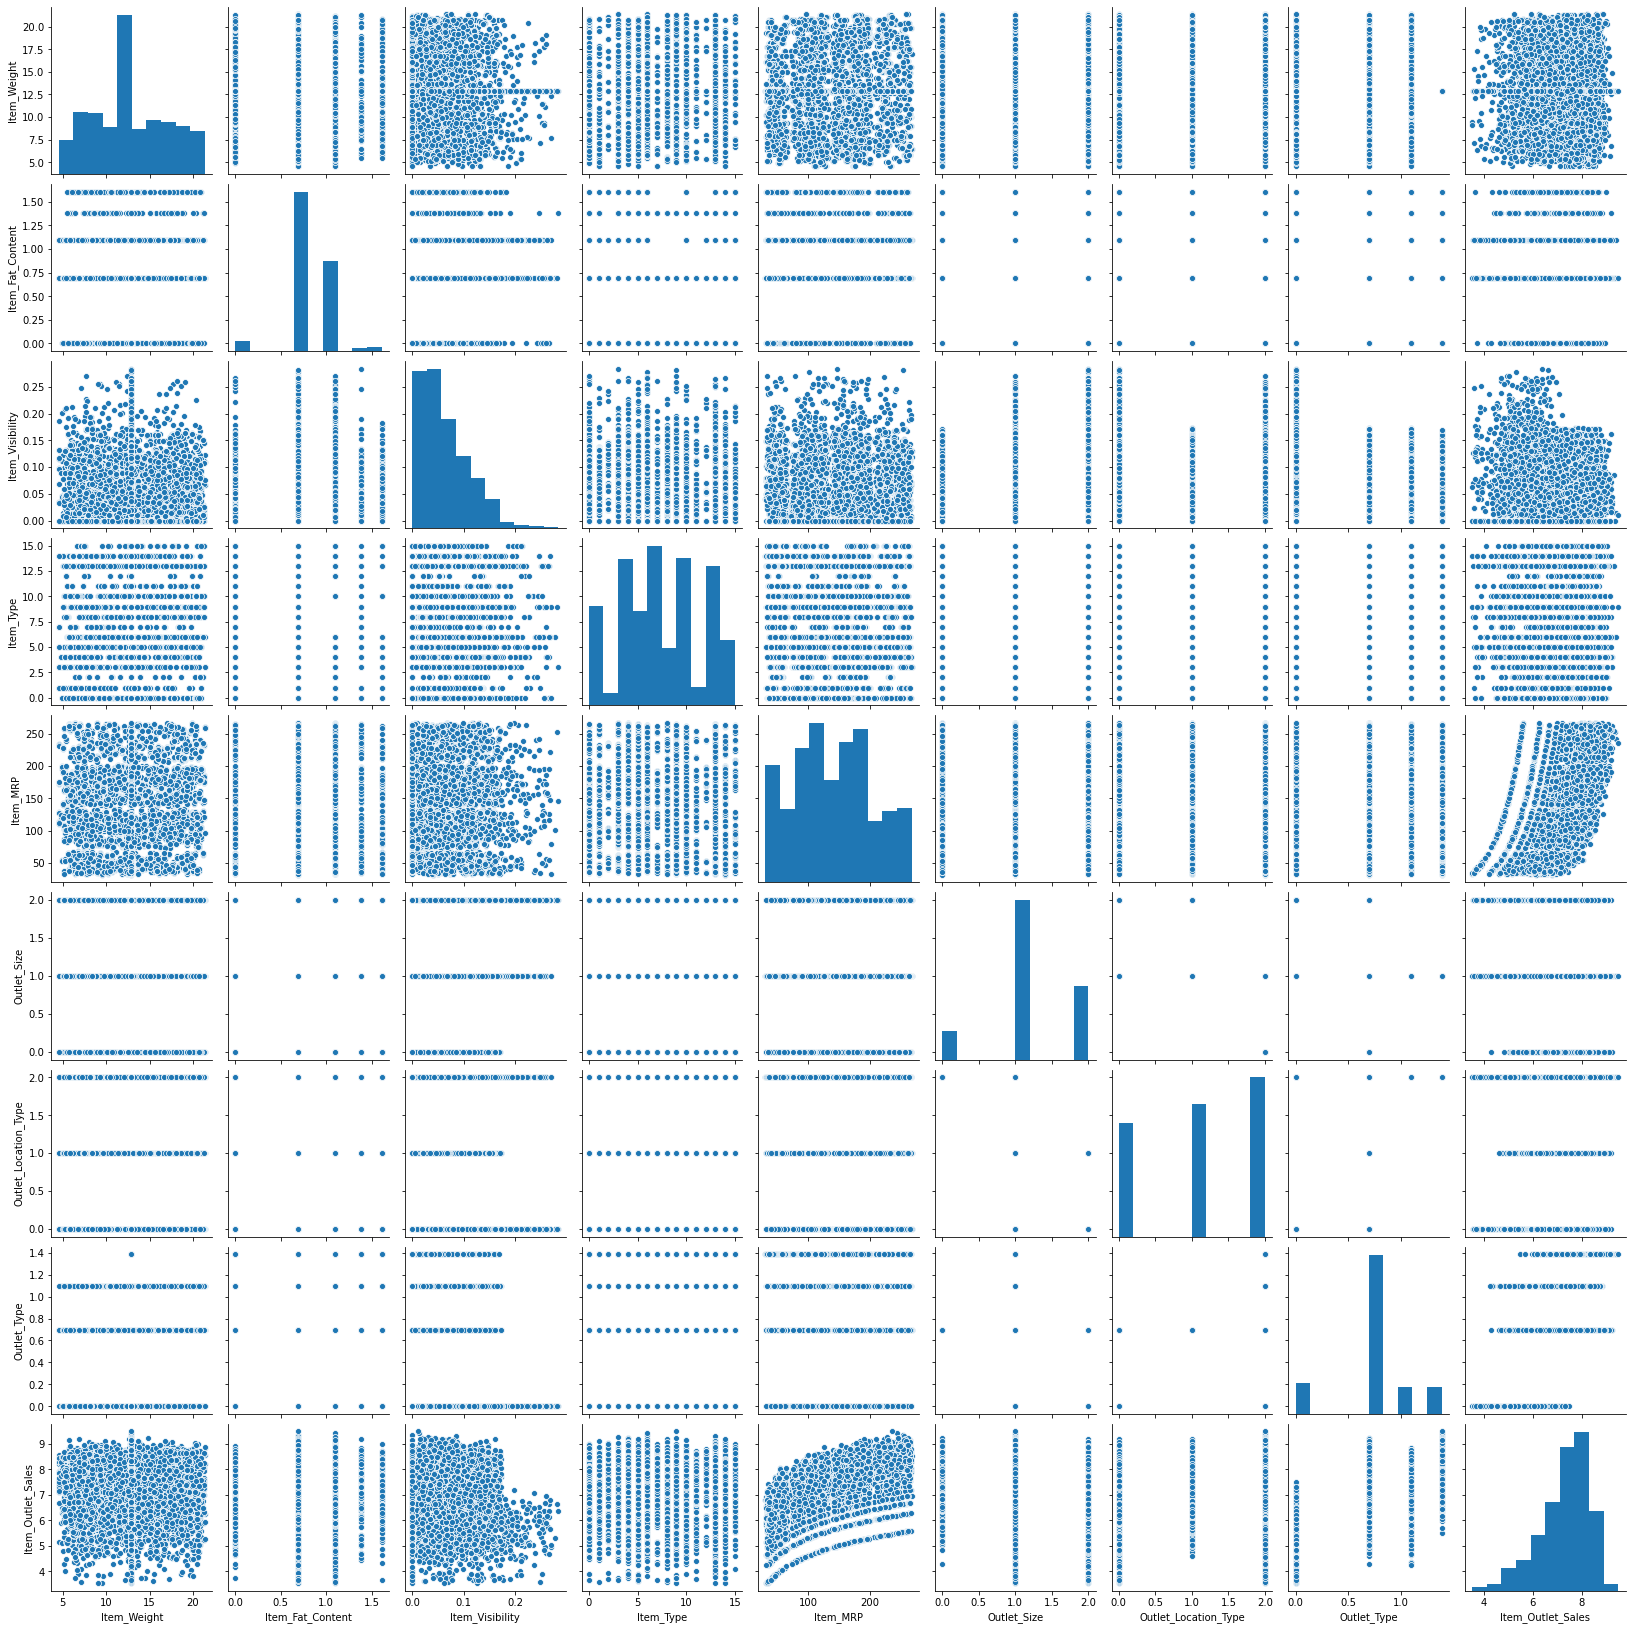

In [117]:
sns.pairplot(Bd1)

In [118]:
Bd1.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.015940,-0.012044,0.028015,0.024756,-0.007225,0.004088,-0.001187,0.008059
Item_Fat_Content,-0.015940,1.000000,0.033649,-0.115934,0.002278,-0.011713,-0.006528,-0.002072,0.007620
Item_Visibility,-0.012044,0.033649,1.000000,-0.035995,-0.000701,0.067534,-0.027210,-0.220345,-0.188500
Item_Type,0.028015,-0.115934,-0.035995,1.000000,0.032651,-0.001859,0.003084,0.003380,0.019914
Item_MRP,0.024756,0.002278,-0.000701,0.032651,1.000000,0.006059,0.000232,0.000053,0.509886
Outlet_Size,-0.007225,-0.011713,0.067534,-0.001859,0.006059,1.000000,-0.614311,-0.223204,-0.122951
Outlet_Location_Type,0.004088,-0.006528,-0.027210,0.003084,0.000232,-0.614311,1.000000,0.389361,0.059030
Outlet_Type,-0.001187,-0.002072,-0.220345,0.003380,0.000053,-0.223204,0.389361,1.000000,0.574313
Item_Outlet_Sales,0.008059,0.007620,-0.188500,0.019914,0.509886,-0.122951,0.059030,0.574313,1.000000


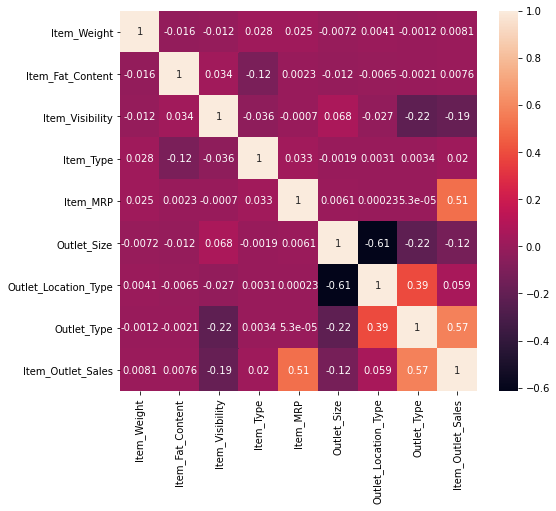

In [119]:
corr_hmap=Bd1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Item_Weight                AxesSubplot(0.125,0.536818;0.133621x0.343182)
Item_Fat_Content        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Item_Visibility          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Item_Type               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Item_MRP                AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Outlet_Size                   AxesSubplot(0.125,0.125;0.133621x0.343182)
Outlet_Location_Type       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Outlet_Type                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
Item_Outlet_Sales          AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

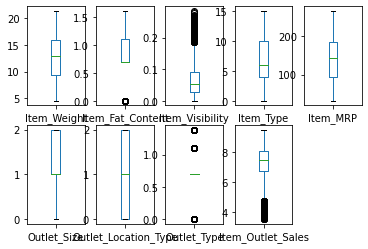

In [120]:
Bd1.plot(kind='box',subplots=True,layout=(2,5))


In [121]:
Bd1.shape

(8523, 9)

In [122]:
Bd1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.693147,0.015920,4,249.8092,1,0,0.693147,8.225808
1,5.92,1.098612,0.019095,14,48.2692,1,2,1.098612,6.096776
2,17.50,0.693147,0.016621,10,141.6180,1,0,0.693147,7.648868
3,19.20,1.098612,0.000000,6,182.0950,1,2,0.000000,6.597664
4,8.93,0.693147,0.000000,9,53.8614,0,2,0.693147,6.903451


In [123]:
from scipy.stats import zscore
z_score=abs(zscore(Bd1))
print(Bd1.shape)
Bdr=Bd1.loc[(z_score<3).all(axis=1)]
print(Bdr.shape)

(8523, 9)
(8075, 9)


In [124]:
x1=Bdr.iloc[:,0:-1]
x1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.693147,0.015920,4,249.8092,1,0,0.693147
1,5.92,1.098612,0.019095,14,48.2692,1,2,1.098612
2,17.50,0.693147,0.016621,10,141.6180,1,0,0.693147
3,19.20,1.098612,0.000000,6,182.0950,1,2,0.000000
4,8.93,0.693147,0.000000,9,53.8614,0,2,0.693147


In [125]:
y=Bdr.iloc[:,-1]
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)

In [127]:
x.shape

(8075, 8)

In [128]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(40,3000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r_scr=r2_score(y_test,y_pred)
    if r_scr>max_r_score:
        max_r_score=r_scr
        final_r_state=r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)


max r2 score corresponding to 1007 is 0.6635535994155547


In [129]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.61996276, 0.61721137, 0.5959433 , 0.6043708 , 0.62295103])

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=170,test_size=0.40)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [131]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is:',r2_score(y_test,y_pred))

RMSE is: 0.6003029509526719
r2_score is: 0.6234659610039311
